In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Load the email data

In [2]:
file_path = r"D:\LIUZHICHENG\Udemy\Machine Learning\Classification Bootmap\ML Classification Package\7. Naive Bayes\emails.csv"
df = pd.read_csv(file_path)
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## EDA

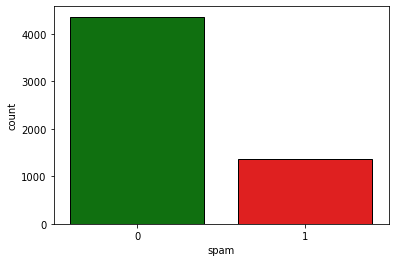

In [5]:
sns.countplot(data=df, x="spam", palette={0: "green", 1: "red"}, edgecolor="black");

In [6]:
df["spam"].value_counts() / len(df["spam"]) * 100

0    76.117318
1    23.882682
Name: spam, dtype: float64

## Model Training (CountVectorizer)

In [7]:
X = df["text"]
y = df["spam"]

from sklearn.model_selection import train_test_split

# stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

clf_nb_1 = MultinomialNB()
clf_nb_1.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_nb_1.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.97      0.99      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

0.9912739965095986
[[865   7]
 [  3 271]]


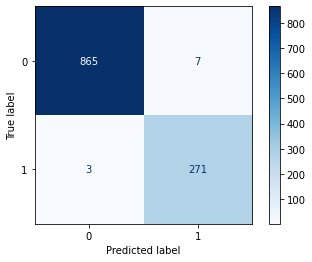

In [8]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=clf_nb_1, X=X_test, y_true=y_test, cmap="Blues");

## Model Training (TfidfVectorizer)

In [9]:
X = df["text"]
y = df["spam"]

from sklearn.model_selection import train_test_split

# stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X_train = tv.fit_transform(X_train)
X_test = tv.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

clf_nb_2 = MultinomialNB()
clf_nb_2.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_nb_2.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       872
           1       1.00      0.45      0.62       274

    accuracy                           0.87      1146
   macro avg       0.93      0.72      0.77      1146
weighted avg       0.89      0.87      0.85      1146

0.868237347294939
[[872   0]
 [151 123]]


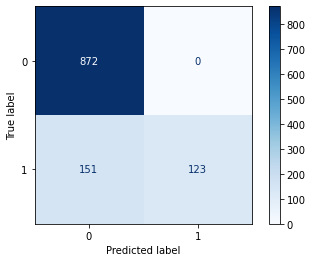

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=clf_nb_2, X=X_test, y_true=y_test, cmap="Blues");

### Predicting testing sample

In [11]:
testing = ["Free Money", "Hi! Please send me your email and get free money!"]
testing_cv = cv.transform(testing)
testing_tv = tv.transform(testing)

In [12]:
clf_nb_1.predict(testing_cv)

array([1, 1], dtype=int64)

In [13]:
clf_nb_2.predict(testing_tv)

array([1, 0], dtype=int64)